In [27]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn. mixture import BayesianGaussianMixture
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
from elasticSearch import db_elasticsearch

# TFIDF

In [54]:
src_paths = glob.glob('/Users/klara/Documents/Uni/bachelorarbeit/data/0/*.pdf')
image_basepath = '/Users/klara/Documents/Uni/bachelorarbeit/images/'

In [12]:
# tfidf embedding incl. all-zero-vector-flag
tfidf_matrix, sim_docs_tfidf = db_elasticsearch.tfidf_aux(src_paths)
tfidf_matrix

[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading 

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.09244566, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [37]:
tfidf_df = pd.DataFrame({'path': src_paths, 'tfidf': 0})
tfidf_df.set_index('path', inplace=True)
# inserting a list in a cell, c.f. https://stackoverflow.com/questions/48000225/must-have-equal-len-keys-and-value-when-setting-with-an-iterable
for i in range(len(src_paths)):
    tfidf_df.loc[[src_paths[i]], 'tfidf'] = pd.Series([list(tfidf_matrix[i].flat)], index=tfidf_df.index[[i]])

tfidf_df

,tfidf
path,
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-21.pdf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC126-12.pdf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC29-14.pdf,"[0.0, 0.0, 0.0, 0.0, 0.05589338691025747, 0.0,..."
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC21-1.pdf,"[0.015044383639141543, 0.0, 0.0, 0.0, 0.014655..."
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC4-45.pdf,"[0.1459385031165665, 0.16043851898463296, 0.0,..."
...,...
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC117-3.pdf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC46-19.pdf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC46-25.pdf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Clustering algos

In [36]:
NUM_CLUSTERS = 4

In [38]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0, n_init="auto").fit(tfidf_df['tfidf'].to_list())
tfidf_df['kmeans_cluster'] = kmeans.labels_

In [39]:
# eps = max. dist ton still be considered neighbour
# min_samples = min. number of neighbours to be considered a core point
DBSCAN_clustering = DBSCAN(eps=0.5, min_samples=2).fit(tfidf_df['tfidf'].to_list())
tfidf_df['DBSCAN_cluster'] = DBSCAN_clustering.labels_

In [40]:
hdbscan_clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)
hdbscan_clusterer.fit(tfidf_df['tfidf'].to_list())
tfidf_df['hdbscan_cluster'] = hdbscan_clusterer.labels_

In [41]:
optics_clustering = OPTICS(min_samples=2).fit(tfidf_df['tfidf'].to_list())
tfidf_df['optics_cluster'] = optics_clustering.labels_

/Users/klara/Developer/Uni/topic-analysis-text-data/.bsc-py/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [42]:
bgm = BayesianGaussianMixture(n_components=2, random_state=42)
tfidf_df['bgm_cluster'] = bgm.fit_predict(tfidf_df['tfidf'].to_list())

# Compare clustering algorithms

In [48]:
# create 2 dim version of tfidf matrix
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tfidf_2dim = pca.fit_transform(tfidf_df['tfidf'].to_list())

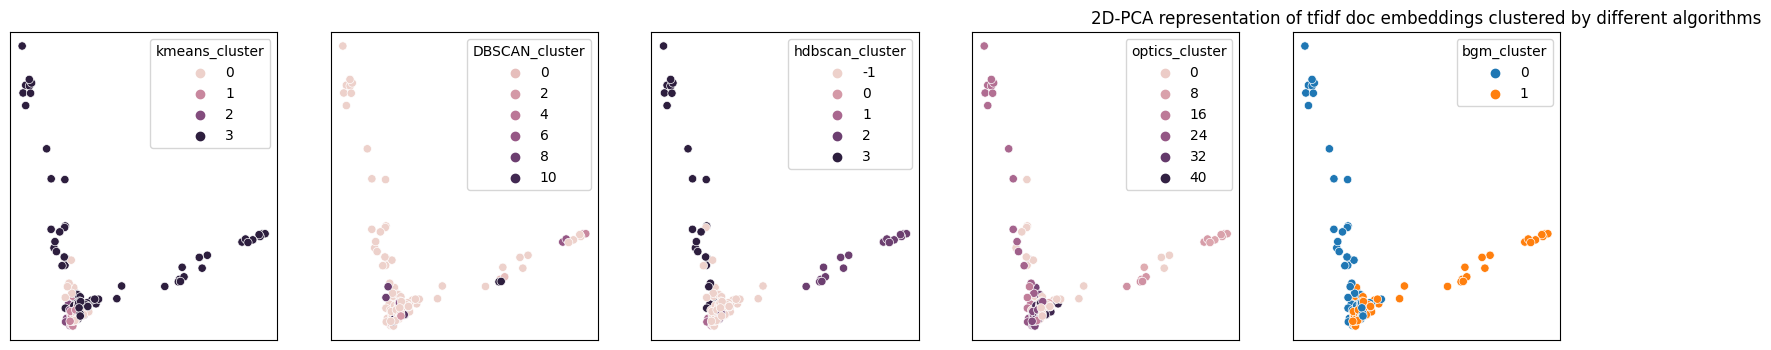

In [51]:
algos = list(tfidf_df.keys())[1:]
num_algos = len(algos)
plt.figure(figsize=(20, 4))

for i in range(1, num_algos + 1):
    # Display original
    ax = plt.subplot(1, num_algos, i)
    sns.scatterplot(x=tfidf_2dim[:,0], y=tfidf_2dim[:,1], hue=tfidf_df[algos[i - 1]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('2D-PCA representation of tfidf doc embeddings clustered by different algorithms', loc='center')
plt.show()

### Inspect clusters

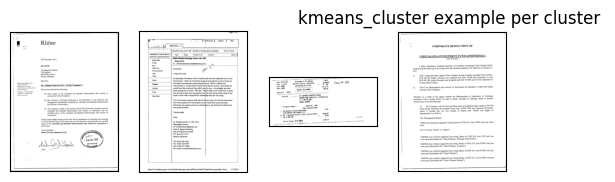

[ WARN:0@2365.993] global loadsave.cpp:248 findDecoder imread_('/Users/klara/Documents/Uni/bachelorarbeit/images/ '): can't open/read file: check file path/integrity


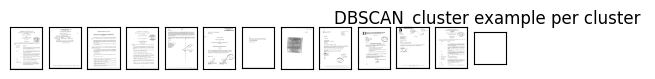

[ WARN:0@2366.162] global loadsave.cpp:248 findDecoder imread_('/Users/klara/Documents/Uni/bachelorarbeit/images/ '): can't open/read file: check file path/integrity


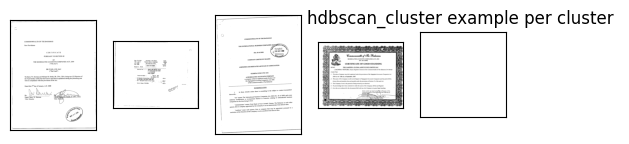

[ WARN:0@2366.644] global loadsave.cpp:248 findDecoder imread_('/Users/klara/Documents/Uni/bachelorarbeit/images/SAC34-38.png'): can't open/read file: check file path/integrity
[ WARN:0@2366.650] global loadsave.cpp:248 findDecoder imread_('/Users/klara/Documents/Uni/bachelorarbeit/images/ '): can't open/read file: check file path/integrity


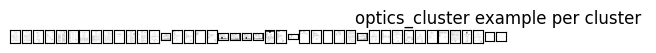

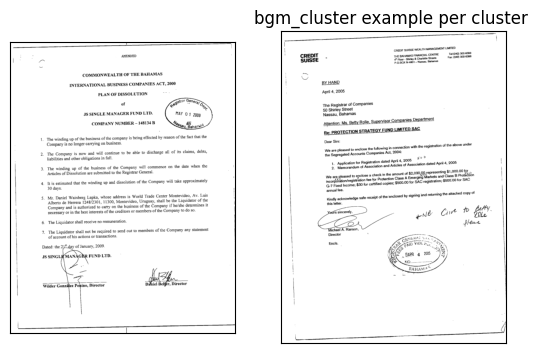

In [62]:
import cv2

d2_example_images = {}
for algo in algos:
    # display sample document per class
    d2_example_images[algo] = []
    for i in range(1, len(set(tfidf_df[algo])) + 1):
        try:
            example_img = tfidf_df[tfidf_df[algo] == i - 1].sample(1).index.values[0].split('/')[-1].split('.')[0] + '.png'
        except:
            example_img = ' '
        img_path = image_basepath + example_img
        d2_example_images[algo].append(img_path)

        ax = plt.subplot(1, len(set(tfidf_df[algo])), i)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        try:
            plt.imshow(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
        except:
            continue
        
    plt.title(f'{algo} example per cluster ')
    plt.show()